<a href="https://colab.research.google.com/github/uto4ka101/Colab_Factor_Analysis_VArimax/blob/main/plot2_varimax_fa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
matplotlib.style.use('ggplot')
%matplotlib inline


# Factor Analysis (with rotation) to visualize patterns

Investigating the Iris dataset, we see that sepal length, petal
length and petal width are highly correlated. Sepal width is
less redundant. Matrix decomposition techniques can uncover
these latent patterns. Applying rotations to the resulting
components does not inherently improve the predictive value
of the derived latent space, but can help visualise their
structure; here, for example, the varimax rotation, which
is found by maximizing the squared variances of the weights,
finds a structure where the second component only loads
positively on sepal width.


In [ ]:
# Authors: Jona Sassenhagen
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

Load Iris data



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 6_5.xlsx to 6_5.xlsx


In [ ]:
df = pd.read_excel('6_5.xlsx')
df

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
0,93.1,92.555831,96.2,99.180445,101.509434,97.400000,97.5,4.9,5.6,99.6,...,95.6,116.900000,85.2,84.8,7.2,82.6,83.8,79.6,96.913000,90.095140
1,92.6,92.319109,95.9,98.127660,101.444043,99.700000,99.3,3.7,4.1,104.0,...,96.0,122.794763,90.3,75.1,6.8,83.1,82.7,78.9,97.961600,106.710150
2,91.1,91.072689,94.5,97.313497,101.107011,94.700000,93.9,3.1,4.0,92.0,...,93.9,112.787274,85.6,100.5,4.6,87.5,83.2,86.4,93.893600,93.158475
3,91.1,90.509862,92.9,97.489207,101.153846,95.400000,95.2,4.3,5.2,94.6,...,94.3,114.996661,76.9,104.5,7.0,64.3,74.6,49.6,95.159400,96.183103
4,91.4,90.903098,94.0,106.685675,101.369863,98.700000,98.4,4.4,5.5,100.3,...,97.8,113.791340,81.1,92.9,6.6,93.5,95.5,92.4,96.336300,96.088352
5,95.2,93.973595,99.4,100.635668,100.450450,95.500000,96.5,6.0,6.8,102.0,...,95.3,116.969679,87.4,74.7,7.9,82.1,74.5,100.0,94.279200,81.182535
6,94.6,93.171372,95.7,97.170081,102.105263,98.500000,99.4,7.2,7.8,101.6,...,97.4,115.832762,88.4,82.1,8.3,94.8,95.6,91.0,98.700000,87.941414
7,92.3,92.201668,94.1,95.913066,100.711744,98.000000,97.5,3.7,4.2,101.3,...,96.3,114.706836,78.4,99.2,5.4,69.6,75.4,59.1,97.207500,109.764760
8,95.7,98.391421,103.3,97.758928,102.264151,100.000000,99.9,4.7,5.4,105.7,...,99.1,109.145595,82.0,75.0,7.9,86.8,80.4,98.0,100.498781,113.263111
9,95.7,98.995177,102.4,97.510638,103.249097,103.588300,102.8,4.5,5.0,110.0,...,96.0,101.969078,90.4,64.7,7.5,96.2,81.8,126.2,102.663757,131.551997


In [ ]:
import math
from sklearn import preprocessing
#  from sklearn.decomposition import PCA


# Функция для стандартизации фич
def scale_features(df):
    scaled = preprocessing.StandardScaler().fit_transform(df)
    scaled = pd.DataFrame(scaled, columns=df.columns)
    return scaled

In [ ]:
df_scaled = preprocessing.scale(df)

In [ ]:
feature_names

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24],
           dtype='int64')

Plot covariance of Iris features



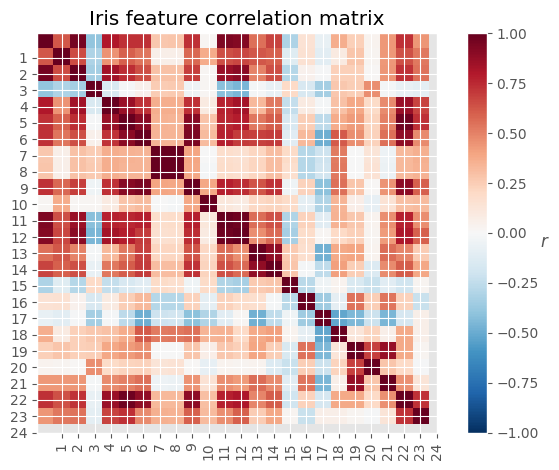

In [ ]:
ax = plt.axes()

im = ax.imshow(np.corrcoef(df_scaled.T), cmap="RdBu_r", vmin=-1, vmax=1)

ax.set_xticks(feature_names)
ax.set_xticklabels(list(feature_names), rotation=90)
ax.set_yticks(feature_names)
ax.set_yticklabels(list(feature_names))

plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("Iris feature correlation matrix")
plt.tight_layout()

Run factor analysis with Varimax rotation



In [ ]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
fa = FactorAnalyzer(4, rotation="varimax", method='principal', use_smc=True)
fa.fit(df_scaled)
loadings = fa.loadings_

In [ ]:
https://colab.research.google.com/drive/1xivl1OqT8GgzEkvjfepdTRYWpZnXIlA1#scrollTo=uMvfHoHWK0vq&line=1&uniqifier=1



 PCA :

[[ 0.27124279 -0.16309959  0.0608016   0.06791187]
 [ 0.21845628 -0.13960987 -0.01565285 -0.20467266]
 [ 0.26452858 -0.17328234  0.09245752  0.09482529]
 [-0.04637497  0.44513038 -0.08157756  0.14649988]
 [ 0.26418359 -0.07338375  0.06156774  0.23086701]
 [ 0.28722095  0.02144241 -0.00364072  0.08095243]
 [ 0.28407761  0.12031431 -0.07143832 -0.02697304]
 [ 0.11603159  0.3296593   0.30224414  0.22354884]
 [ 0.1159229   0.32603144  0.30115074  0.23866687]
 [ 0.28377461  0.07714302  0.04425517 -0.08541739]
 [ 0.08241926  0.12270953  0.02675924 -0.36097445]
 [ 0.2747249  -0.17729507  0.01362615  0.01826875]
 [ 0.26988573 -0.23660283  0.04902253  0.07490964]
 [ 0.2129016   0.12300976 -0.06800606 -0.35749056]
 [ 0.23545643  0.06877407  0.084267   -0.31456331]
 [-0.04847408  0.24366681  0.16662761 -0.40423903]
 [ 0.06899147 -0.08146217 -0.44611551  0.0087156 ]
 [-0.09589576 -0.3406568   0.24383156  0.1736553 ]
 [ 0.14278565  0.33896708  0.08599401  0.00417871]
 [ 0.13799167  0.1340

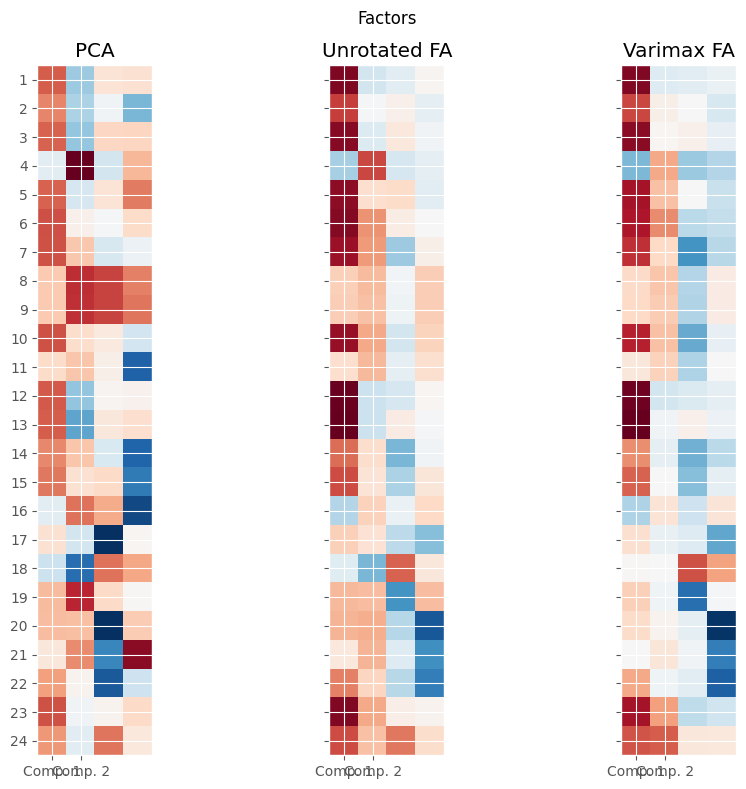

In [ ]:


n_comps = 4

methods = [
    ("PCA", PCA()),
    ("Unrotated FA", FactorAnalysis()),
    ("Varimax FA", FactorAnalysis(rotation="varimax")),
]
fig, axes = plt.subplots(ncols=len(methods), figsize=(10, 8), sharey=True)

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components=n_comps)
    fa.fit(X)

    components = fa.components_.T
    print("\n\n %s :\n" % method)
    print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(feature_names)))
    ax.set_yticklabels(feature_names)
    ax.set_title(str(method))
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Comp. 1", "Comp. 2"])
fig.suptitle("Factors")
plt.tight_layout()
plt.show()

In [ ]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [ ]:
#CHECK ADEQUACY
#Bartlett
#p-value should be 0 (statistically sig.)
chi_square_value,p_value=calculate_bartlett_sphericity(df_scaled)
print(chi_square_value, p_value)

#KMO
#Value should be 0.6<
kmo_all,kmo_model=calculate_kmo(df_scaled)
print(kmo_model)

2170.751590209178 7.247781959995113e-291
0.6744139279959744


/usr/local/lib/python3.10/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(
